In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [2]:
glossary = {
'AST': 'Assists',
'Pay': 'Player salary',
'2P': '2-Point Field Goals',
'2PA': '2-Point Field Goal Attempts',
'FG': 'Field Goals',
'FGA': 'Field Goal Attempts',
'FT': 'Free Throws',
'FTA': 'Free Throw Attempts',
'MP': 'Minutes Played',
'PTS': 'Points',
'TOV': 'Turnovers',
'VORP': 'Value Over Replacement: A box score estimate of the points per 100 TEAM possessions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season.',
'WS': 'An estimate of the number of wins contributed by a player.'
}

df_glossary = pd.DataFrame.from_dict(glossary, orient='index', columns=['Definition']).reset_index(level=0)

In [3]:
data = pd.read_csv('C:/Users/whisk/OneDrive/Documents/Bristol/Economics/Year 4/Data Science/slblundell.github.io/nba_project/data/player_per_game_salary_2023.csv')
data = data.drop(columns=['Unnamed: 0', '2023/24', '2024/25', '2025/26', '2026/27', '2027/28'])

data.head()

,Player,Pos,Age,Tm,MP,FG,FGA,FG%,3P,3PA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,2022/23
0,Precious Achiuwa,C,23,TOR,20.7,3.6,7.3,0.485,0.5,2.0,...,19.4,0.8,1.4,2.2,0.093,-1.4,-0.8,-2.3,-0.1,2840160
1,Steven Adams,C,29,MEM,27.0,3.7,6.3,0.597,0.0,0.0,...,14.6,1.3,2.1,3.4,0.144,-0.3,0.9,0.6,0.7,17926829
2,Bam Adebayo,C,25,MIA,34.6,8.0,14.9,0.540,0.0,0.2,...,25.2,3.6,3.8,7.4,0.137,0.8,0.8,1.5,2.3,30351780
3,Ochai Agbaji,SG,22,UTA,20.5,2.8,6.5,0.427,1.4,3.9,...,15.8,0.9,0.4,1.3,0.053,-1.7,-1.4,-3.0,-0.3,3918360
4,Santi Aldama,PF,22,MEM,21.8,3.2,6.8,0.470,1.2,3.5,...,16.0,2.1,2.4,4.6,0.130,-0.3,0.8,0.5,1.1,2094120


In [4]:
# Create cluster feature
kmeans = KMeans(n_clusters=5)
data["Cluster"] = pd.Series(kmeans.fit_predict(data.drop(columns=(['Player', 'Pos', 'Age', 'Tm'])).dropna()))
data["Cluster"] = data["Cluster"].astype("category")


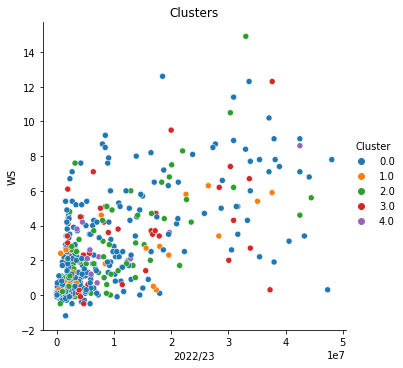

In [5]:
sns.relplot(
    x="2022/23", y="WS", hue="Cluster", data=data, height=5, 
).set(title='Clusters')

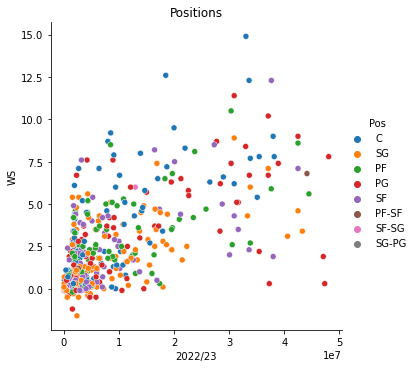

In [6]:
sns.relplot(
    x="2022/23", y="WS", hue="Pos", data=data, height=5,
).set(title='Positions')

In [8]:
corr = data.corr().abs()
corr = corr.loc[corr['2022/23']>.6]
corr.index
variables = list(corr.index)

In [9]:
var_heatmap = variables.copy()
df_correlations = data[var_heatmap].corr().reset_index(level=0).rename(columns={"2022/23": "Pay"}).replace({"2022/23": "Pay"})
df_correlations = df_correlations.melt('index', var_name='Variable', value_name='Correlation')

df_correlations = pd.merge(df_correlations, df_glossary, on='index').reset_index(drop=True)
df_correlations.to_csv('C:/Users/whisk/OneDrive/Documents/Bristol/Economics/Year 4/Data Science/slblundell.github.io/nba_project/data/chart_4_correlations.csv')

In [10]:
var_heatmap.insert(0, 'Player')
var_heatmap.insert(1, var_heatmap.pop(-1))
var_heatmap.insert(2, 'Tm')
var_heatmap.insert(3, 'Pos')

df_filter = data[var_heatmap].reset_index(drop=True).rename(columns={"2022/23": "Salary 2022/23"})


In [11]:
df_filter

,Player,Salary 2022/23,Tm,Pos,MP,FG,FGA,2P,2PA,FT,FTA,TOV,PTS,WS,VORP
0,Precious Achiuwa,2840160,TOR,C,20.7,3.6,7.3,3.0,5.4,1.6,2.3,1.1,9.2,2.2,-0.1
1,Steven Adams,17926829,MEM,C,27.0,3.7,6.3,3.7,6.2,1.1,3.1,1.9,8.6,3.4,0.7
2,Bam Adebayo,30351780,MIA,C,34.6,8.0,14.9,8.0,14.7,4.3,5.4,2.5,20.4,7.4,2.3
3,Ochai Agbaji,3918360,UTA,SG,20.5,2.8,6.5,1.4,2.7,0.9,1.2,0.7,7.9,1.3,-0.3
4,Santi Aldama,2094120,MEM,PF,21.8,3.2,6.8,2.0,3.4,1.4,1.9,0.8,9.0,4.6,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,Thaddeus Young,8000000,TOR,PF,14.7,2.0,3.7,1.9,3.0,0.3,0.5,0.8,4.4,1.8,0.4
533,Trae Young,37096500,ATL,PG,34.8,8.2,19.0,6.1,12.7,7.8,8.8,4.1,26.2,6.7,3.4
534,Omer Yurtseven,1752638,MIA,C,9.2,1.8,3.0,1.4,2.2,0.6,0.7,0.4,4.4,0.3,0.0
535,Cody Zeller,743922,MIA,C,14.5,2.5,3.9,2.5,3.8,1.6,2.3,0.9,6.5,0.7,0.0


In [12]:
df_filter.to_csv('C:/Users/whisk/OneDrive/Documents/Bristol/Economics/Year 4/Data Science/slblundell.github.io/nba_project/data/chart_4_player_data.csv')